<a href="https://colab.research.google.com/github/thompsonkate1/Python-Project/blob/main/PythonFinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#__Initial Stuff__

###__Importing Packages__

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn as skl
import scipy

###__Uploading CSVs__

In [2]:
from google.colab import files
uploaded=files.upload()
graduation_rate=pd.read_csv("graduation_rate.csv")
IPR=pd.read_csv("IPR.csv")
print(graduation_rate.head(5))
print(IPR.head(5))
print(graduation_rate.columns.to_list())
print(IPR.columns.to_list())

Saving graduation_rate.csv to graduation_rate.csv
Saving IPR.csv to IPR.csv
   ACT composite score  SAT total score parental level of education  \
0                   30             2206             master's degree   
1                   26             1953                some college   
2                   28             2115            some high school   
3                   33             2110            some high school   
4                   30             2168           bachelor's degree   

   parental income  high school gpa  college gpa  years to graduate  
0            94873              4.0          3.8                  3  
1            42767              3.6          2.7                  9  
2            46316              4.0          3.3                  5  
3            52370              4.0          3.5                  4  
4            92665              4.0          3.6                  4  
           X          Y      NCESSCH                                 NAME  \


#__Kaggle 1000 Analysis__

###__Messing Around with Graphs__ (Will add more later)

AttributeError: ignored

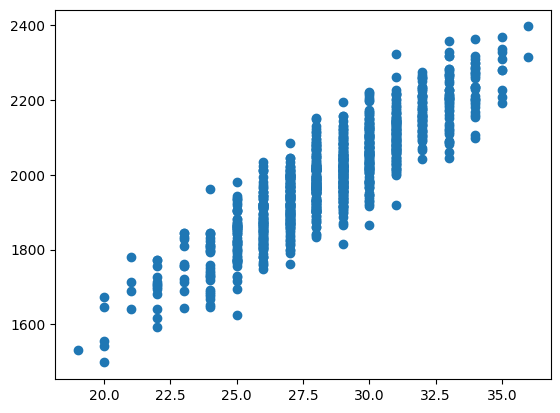

In [32]:
sat = graduation_rate['SAT total score']
act = graduation_rate['ACT composite score']
SATvsACT=plt.scatter(act,sat), plt.xlablel("SAT total score"), plt.ylabel("ACT composite Score"), plt.title("SAT Score vs. ACT Score")

In [ ]:
gradratepairwise=sns.pairplot(graduation_rate)

In [ ]:
for ax in gradratepairwise.axes.flat:
    if ax.get_xlabel() != ax.get_ylabel():  # Exclude diagonal subplots/histograms
        sns.regplot(x=ax.get_xlabel(), y=ax.get_ylabel(), data=graduation_rate, ax=ax)


In [ ]:
from mpl_toolkits import mplot3d

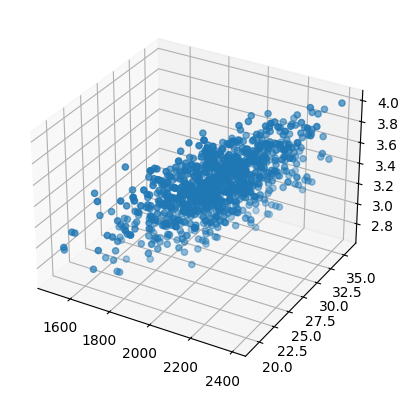

In [31]:
#This is making a graph that compares SAT and ACT score to college GPA.
satactcolgpa=plt.axes(projection='3d')
colgpa=graduation_rate["college gpa"]
satactcolgpa.scatter3D(sat,act,colgpa)

In [ ]:
for column in graduation_rate.columns.to_list():
  print(column)

#__Linear Regression__

##__Linear Regresssion Model Creation__

###__IPR to SAT Score Model__ (& Initializing Work)

In [59]:
#I am going to create a linear regression model that predicts an SAT score given an IPR value.
#This will work to predict the average SAT value of a school given its IPR value.

#This code below is just initializing some variables that will be needed
#in order to fill the list KaggleIPRvalues in the following for loop.
from sklearn.linear_model import LinearRegression
parentalincomelist=graduation_rate["parental income"].tolist()
povertylevel=30000
#Since our Kaggle dataset deals with parental income, but our dataset of ~100,000 schools contains IPR values, we need to find a way to equate parental income to IPR in order to generate IPR values for our model.
#The number of $30,000 as the poverty level operates on the assumption that every one of our Kaggle students lived in a family of four.
#The $30,000 is the Federal Poverty Level for 2023 for a family of four.
KaggleIPRvalues=[]

#This for loop is filling a list with our Kaggle "IPR values"
for income in parentalincomelist:
  IPRvalue=(income/povertylevel)*100
  KaggleIPRvalues.append(IPRvalue)

#Everything above this point won't need to be repeated in order to create additional models.
#This code block is actually creating our linear regression model (for IPR to SAT).
IPRtrainer = np.array(KaggleIPRvalues).reshape((-1, 1))
SATtrainer = np.array(graduation_rate["SAT total score"].to_list())
SATpredictor = LinearRegression().fit(IPRtrainer,SATtrainer)

#I'm just going to calculate the R score to see how well it fits.
Rscore=SATpredictor.score(IPRtrainer,SATtrainer)
print("R score: {}".format(Rscore))

#And now I am going to create a dictionary that keeps track of the R score for each predictor/model that I make.
Rscoresdict={}
Rscoresdict["SAT Predictor"]=Rscore
print(Rscoresdict)

R score: 0.06128380804226963
{'SAT Predictor': 0.06128380804226963}


In [60]:
#I am not going to be worrying about any sort of real data from our data set right now. I'm just going to see if the model sort of works :)
#My previous code worked and I'm literally so proud
SATprediction=SATpredictor.predict(np.array([800]).reshape((-1, 1)))
print(SATprediction)

[2312.85588281]


In [61]:
#Sweet. That worked. Now I need to figure out how to make it do that for every single IPR in the whole data set...
def IPRtoSAT():
  n=0
  for incomepovertyratio in IPR["IPR_EST"].tolist():
    predictedSATscore=SATpredictor.predict(np.array([incomepovertyratio]).reshape((-1, 1)))
    #IPR["SAT Score Prediction"][n]=predictedSATscore // I'm not fully sure why this didn't work, but the other way did...
    IPR.at[n, "SAT Score Prediction"] = predictedSATscore
    n+=1

In [62]:
#Dude. Did that for real just work??? (No syntax errors!)
#Calling the function.
IPRtoSAT()

In [63]:
print(IPR.head(5))

           X          Y      NCESSCH                                 NAME  \
0 -86.206174  34.260194  10000500870            Albertville Middle School   
1 -86.204884  34.262226  10000500871              Albertville High School   
2 -86.220144  34.273318  10000500879              Evans Elementary School   
3 -86.221834  34.253251  10000500889        Albertville Elementary School   
4 -86.193289  34.289849  10000501616  Big Spring Lake Kindergarten School   

   IPR_EST  IPR_SE  OBJECTID_1        LAT        LON SCHOOLYEAR  \
0      245      80           1  34.260194 -86.206174  2017-2018   
1      248      80           2  34.262226 -86.204884  2017-2018   
2      174      91           3  34.273318 -86.220144  2017-2018   
3      236     105           4  34.253251 -86.221834  2017-2018   
4      480     120           5  34.289849 -86.193289  2017-2018   

   SAT Score Prediction  ACT Score Prediction  College GPA Prediction  \
0           2010.400921             31.361118                

###__IPR to ACT Score Model__

In [64]:
#Imma be risky and try to amalgamate all of the previous code into one code box in this notebook. Wish me luck!
#This is actually creating a whole separate model though, this time to predict ACT score.
#This code block is create a new linear regression model (for IPR to ACT).
IPRtrainer = np.array(KaggleIPRvalues).reshape((-1, 1))
ACTtrainer = np.array(graduation_rate["ACT composite score"].to_list())
ACTpredictor = LinearRegression().fit(IPRtrainer,ACTtrainer)

#I'm just going to calculate the R score to see how well it fits.
Rscore=ACTpredictor.score(IPRtrainer,ACTtrainer)
print("R score: {}".format(Rscore))

#And now I am going to update the Rscoresdict.
Rscoresdict["ACT Predictor"]=Rscore
print(Rscoresdict)
#-----------------------------------------------
def IPRtoACT():
  n=0
  for incomepovertyratio in IPR["IPR_EST"].tolist():
    predictedACTscore=ACTpredictor.predict(np.array([incomepovertyratio]).reshape((-1, 1)))
    #IPR["SAT Score Prediction"][n]=predictedSATscore // I'm not fully sure why this didn't work, but the other way did...
    IPR.at[n, "ACT Score Prediction"] = predictedACTscore
    n+=1
#-----------------------------------------------
IPRtoACT()
print(IPR.head())

R score: 0.03381141133151366
{'SAT Predictor': 0.06128380804226963, 'ACT Predictor': 0.03381141133151366}
           X          Y      NCESSCH                                 NAME  \
0 -86.206174  34.260194  10000500870            Albertville Middle School   
1 -86.204884  34.262226  10000500871              Albertville High School   
2 -86.220144  34.273318  10000500879              Evans Elementary School   
3 -86.221834  34.253251  10000500889        Albertville Elementary School   
4 -86.193289  34.289849  10000501616  Big Spring Lake Kindergarten School   

   IPR_EST  IPR_SE  OBJECTID_1        LAT        LON SCHOOLYEAR  \
0      245      80           1  34.260194 -86.206174  2017-2018   
1      248      80           2  34.262226 -86.204884  2017-2018   
2      174      91           3  34.273318 -86.220144  2017-2018   
3      236     105           4  34.253251 -86.221834  2017-2018   
4      480     120           5  34.289849 -86.193289  2017-2018   

   SAT Score Prediction  ACT

###__IPR to College GPA Model__

In [65]:
#This code block is create a new linear regression model (for IPR to college GPA).
IPRtrainer = np.array(KaggleIPRvalues).reshape((-1, 1))
colGPAtrainer = np.array(graduation_rate["college gpa"].to_list())
colGPApredictor = LinearRegression().fit(IPRtrainer,colGPAtrainer)

#I'm just going to calculate the R score to see how well it fits.
Rscore=colGPApredictor.score(IPRtrainer,colGPAtrainer)
print("R score: {}".format(Rscore))

#And now I am going to update the Rscoresdict.
Rscoresdict["College GPA Predictor"]=Rscore
print(Rscoresdict)
#-----------------------------------------------
def IPRtoColGPA():
  n=0
  for incomepovertyratio in IPR["IPR_EST"].tolist():
    predictedcolGPA=colGPApredictor.predict(np.array([incomepovertyratio]).reshape((-1, 1)))
    #IPR["SAT Score Prediction"][n]=predictedSATscore // I'm not fully sure why this didn't work, but the other way did...
    IPR.at[n, "College GPA Prediction"] = predictedcolGPA
    n+=1
#-----------------------------------------------
IPRtoColGPA()
print(IPR.head())

R score: 0.21239433300345745
{'SAT Predictor': 0.06128380804226963, 'ACT Predictor': 0.03381141133151366, 'College GPA Predictor': 0.21239433300345745}
           X          Y      NCESSCH                                 NAME  \
0 -86.206174  34.260194  10000500870            Albertville Middle School   
1 -86.204884  34.262226  10000500871              Albertville High School   
2 -86.220144  34.273318  10000500879              Evans Elementary School   
3 -86.221834  34.253251  10000500889        Albertville Elementary School   
4 -86.193289  34.289849  10000501616  Big Spring Lake Kindergarten School   

   IPR_EST  IPR_SE  OBJECTID_1        LAT        LON SCHOOLYEAR  \
0      245      80           1  34.260194 -86.206174  2017-2018   
1      248      80           2  34.262226 -86.204884  2017-2018   
2      174      91           3  34.273318 -86.220144  2017-2018   
3      236     105           4  34.253251 -86.221834  2017-2018   
4      480     120           5  34.289849 -86.1932

###__IPR to Years to Graduate Model__

In [66]:
#This code block is create a new linear regression model (for IPR to years to graduate).
IPRtrainer = np.array(KaggleIPRvalues).reshape((-1, 1))
yearstrainer = np.array(graduation_rate["years to graduate"].to_list())
yearspredictor = LinearRegression().fit(IPRtrainer,yearstrainer)

#I'm just going to calculate the R score to see how well it fits.
Rscore=yearspredictor.score(IPRtrainer,yearstrainer)
print("R score: {}".format(Rscore))

#And now I am going to update the Rscoresdict.
Rscoresdict["Years Predictor"]=Rscore
print(Rscoresdict)
#-----------------------------------------------
def IPRtoYears():
  n=0
  for incomepovertyratio in IPR["IPR_EST"].tolist():
    predictedyears=yearspredictor.predict(np.array([incomepovertyratio]).reshape((-1, 1)))
    #IPR["SAT Score Prediction"][n]=predictedSATscore // I'm not fully sure why this didn't work, but the other way did...
    IPR.at[n, "Years Prediction"] = predictedyears
    n+=1
#-----------------------------------------------
IPRtoYears()
print(IPR.head())

R score: 0.0573600899025023
{'SAT Predictor': 0.06128380804226963, 'ACT Predictor': 0.03381141133151366, 'College GPA Predictor': 0.21239433300345745, 'Years Predictor': 0.0573600899025023}
           X          Y      NCESSCH                                 NAME  \
0 -86.206174  34.260194  10000500870            Albertville Middle School   
1 -86.204884  34.262226  10000500871              Albertville High School   
2 -86.220144  34.273318  10000500879              Evans Elementary School   
3 -86.221834  34.253251  10000500889        Albertville Elementary School   
4 -86.193289  34.289849  10000501616  Big Spring Lake Kindergarten School   

   IPR_EST  IPR_SE  OBJECTID_1        LAT        LON SCHOOLYEAR  \
0      245      80           1  34.260194 -86.206174  2017-2018   
1      248      80           2  34.262226 -86.204884  2017-2018   
2      174      91           3  34.273318 -86.220144  2017-2018   
3      236     105           4  34.253251 -86.221834  2017-2018   
4      480  

###__IPR to High School GPA Model__

In [68]:
#This code block is create a new linear regression model (for IPR to high school GPA).
IPRtrainer = np.array(KaggleIPRvalues).reshape((-1, 1))
hsGPAtrainer = np.array(graduation_rate["high school gpa"].to_list())
hsGPApredictor = LinearRegression().fit(IPRtrainer,hsGPAtrainer)

#I'm just going to calculate the R score to see how well it fits.
Rscore=hsGPApredictor.score(IPRtrainer,hsGPAtrainer)
print("R score: {}".format(Rscore))

#And now I am going to update the Rscoresdict.
Rscoresdict["High School GPA Predictor"]=Rscore
print(Rscoresdict)
#-----------------------------------------------
def IPRtohsGPA():
  n=0
  for incomepovertyratio in IPR["IPR_EST"].tolist():
    predictedhsGPA=hsGPApredictor.predict(np.array([incomepovertyratio]).reshape((-1, 1)))
    #IPR["SAT Score Prediction"][n]=predictedSATscore // I'm not fully sure why this didn't work, but the other way did...
    IPR.at[n, "HS GPA Prediction"] = predictedhsGPA
    n+=1
#-----------------------------------------------
IPRtohsGPA()
print(IPR.head())

R score: 0.051637313314820577
{'SAT Predictor': 0.06128380804226963, 'ACT Predictor': 0.03381141133151366, 'College GPA Predictor': 0.21239433300345745, 'Years Predictor': 0.0573600899025023, 'High School GPA Predictor': 0.051637313314820577}
           X          Y      NCESSCH                                 NAME  \
0 -86.206174  34.260194  10000500870            Albertville Middle School   
1 -86.204884  34.262226  10000500871              Albertville High School   
2 -86.220144  34.273318  10000500879              Evans Elementary School   
3 -86.221834  34.253251  10000500889        Albertville Elementary School   
4 -86.193289  34.289849  10000501616  Big Spring Lake Kindergarten School   

   IPR_EST  IPR_SE  OBJECTID_1        LAT        LON SCHOOLYEAR  \
0      245      80           1  34.260194 -86.206174  2017-2018   
1      248      80           2  34.262226 -86.204884  2017-2018   
2      174      91           3  34.273318 -86.220144  2017-2018   
3      236     105        

#__Prediction Histograms__

##__SAT Prediction Histogram__

Text(0.5, 1.0, 'SAT Score Prediction Distribution')

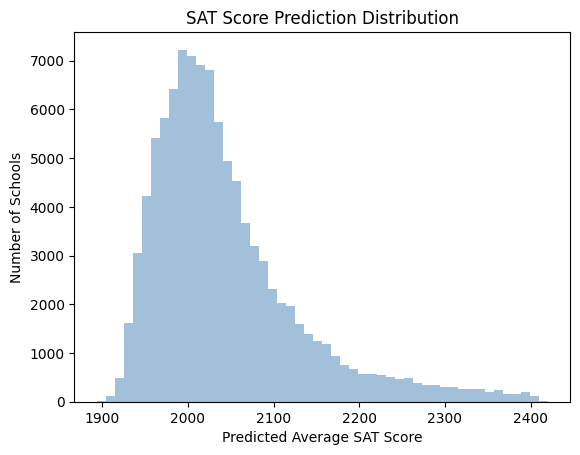

In [69]:
#I am going to plot histograms of the predicted data to see if, for example, predicted SAT scores for our ~100,000 schools skew high
#This is the histogram for SAT Score Prediction
predictedSAThist= plt.hist(IPR["SAT Score Prediction"], bins=50, alpha=0.5, histtype='stepfilled', color='steelblue',edgecolor='none')
plt.xlabel("Predicted Average SAT Score")
plt.ylabel("Number of Schools")
plt.title("SAT Score Prediction Distribution")

##__ACT Prediction Histogram__

Text(0.5, 1.0, 'ACT Score Prediction Distribution')

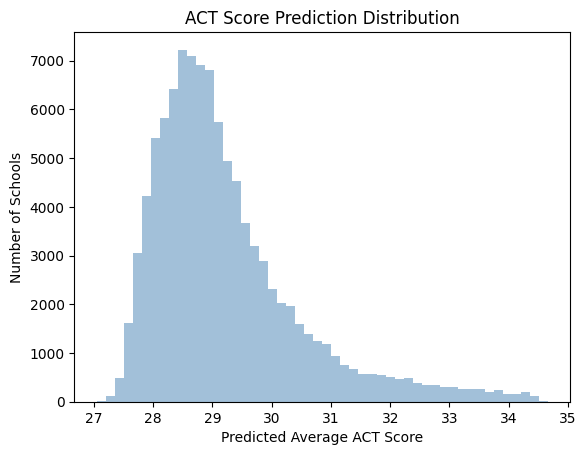

In [70]:
#This is the histogram for ACT Score Prediction
predictedACThist=plt.hist(IPR["ACT Score Prediction"], bins=50, alpha=0.5, histtype='stepfilled', color='steelblue',edgecolor='none')
plt.xlabel("Predicted Average ACT Score")
plt.ylabel("Number of Schools")
plt.title("ACT Score Prediction Distribution")

##__College GPA Prediction Histogram__

Text(0.5, 1.0, 'College GPA Prediction Distribution')

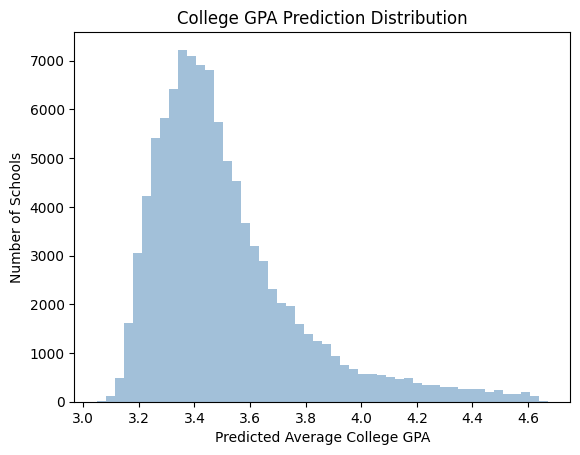

In [71]:
#This is the histogram for College GPA Prediction
predictedcolGPAhist=plt.hist(IPR["College GPA Prediction"], bins=50, alpha=0.5, histtype='stepfilled', color='steelblue',edgecolor='none')
plt.xlabel("Predicted Average College GPA")
plt.ylabel("Number of Schools")
plt.title("College GPA Prediction Distribution")

##__Years Prediction Histogram__

Text(0.5, 1.0, 'Years to Graduate Prediction Distribution')

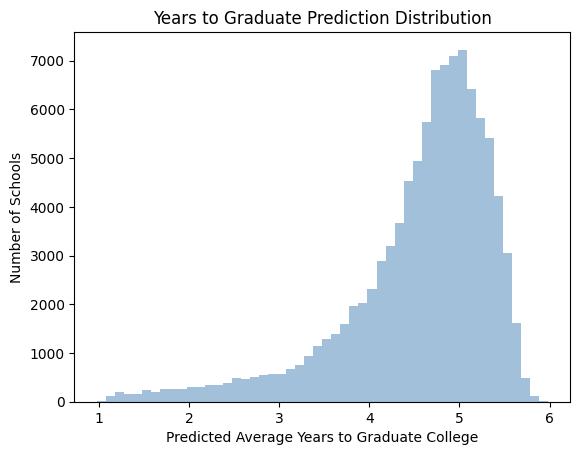

In [81]:
#This is the histogram for Years Prediction
predictedyearshist=plt.hist(IPR["Years Prediction"], bins=50, alpha=0.5, histtype='stepfilled', color='steelblue',edgecolor='none')
plt.xlabel("Predicted Average Years to Graduate College")
plt.ylabel("Number of Schools")
plt.title("Years to Graduate Prediction Distribution")

##__HS GPA Prediction Histogram__

Text(0.5, 1.0, 'High School GPA Prediction Distribution')

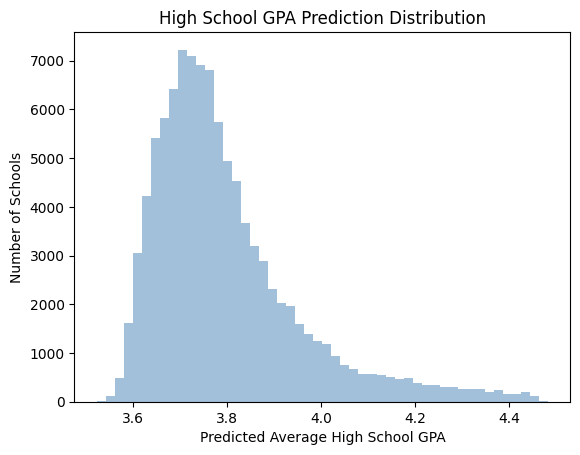

In [80]:
#This is the histogram for HS GPA Prediction
predictedhsGPAhist=plt.hist(IPR["HS GPA Prediction"], bins=50, alpha=0.5, histtype='stepfilled', color='steelblue',edgecolor='none')
plt.xlabel("Predicted Average High School GPA")
plt.ylabel("Number of Schools")
plt.title("High School GPA Prediction Distribution")

#__Prediction Graphs__


###__SAT Prediction Graph__

Text(0.5, 1.0, 'IPR to Predicted Average SAT Score')

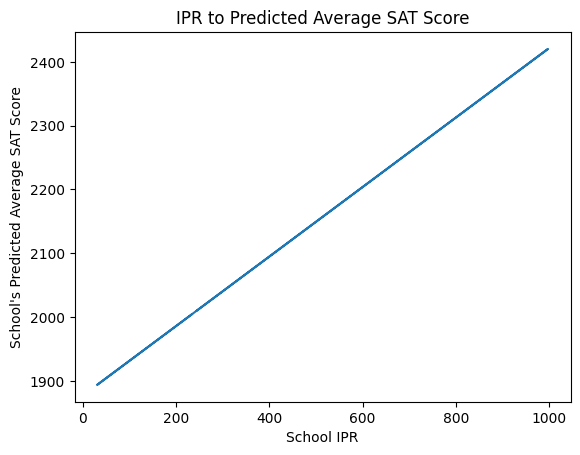

In [82]:
#I am going to create graphs of IPR vs. predicted value for all of our models
#I'll start with the SAT Score Prediction for now
predictedSATgraph=plt.plot(IPR["IPR_EST"],IPR["SAT Score Prediction"])
plt.xlabel("School IPR")
plt.ylabel("School's Predicted Average SAT Score")
plt.title("IPR to Predicted Average SAT Score")

###__ACT Prediction Graph__

Text(0.5, 1.0, 'IPR to Predicted Average ACT Score')

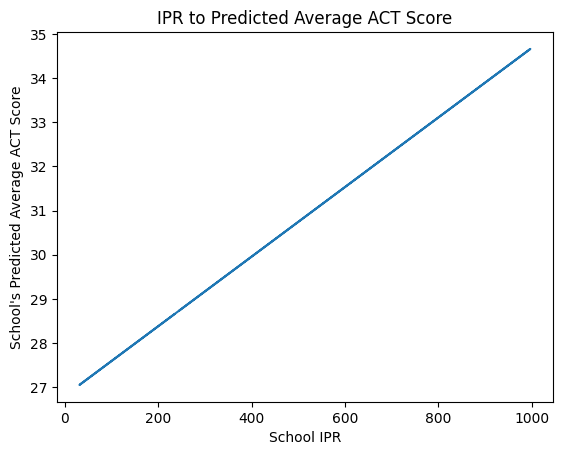

In [83]:
predictedACTgraph=plt.plot(IPR["IPR_EST"],IPR["ACT Score Prediction"])
plt.xlabel("School IPR")
plt.ylabel("School's Predicted Average ACT Score")
plt.title("IPR to Predicted Average ACT Score")

###__College GPA Prediction Graph__

Text(0.5, 1.0, 'IPR to College GPA')

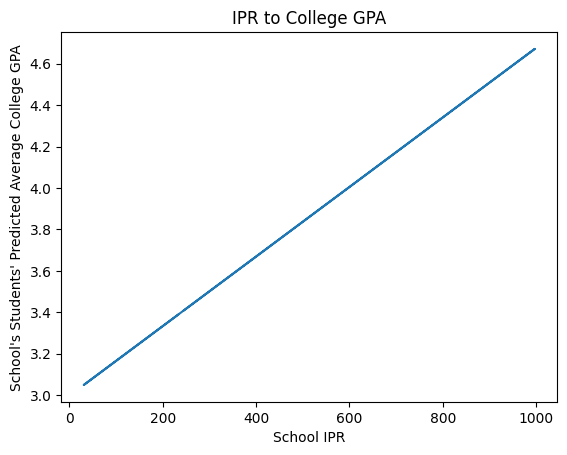

In [84]:
predictedcolGPAgraph=plt.plot(IPR["IPR_EST"],IPR["College GPA Prediction"])
plt.xlabel("School IPR")
plt.ylabel("School's Students' Predicted Average College GPA")
plt.title("IPR to College GPA")

###__Years Prediction Graph__

Text(0.5, 1.0, 'IPR to Years to Graduate College')

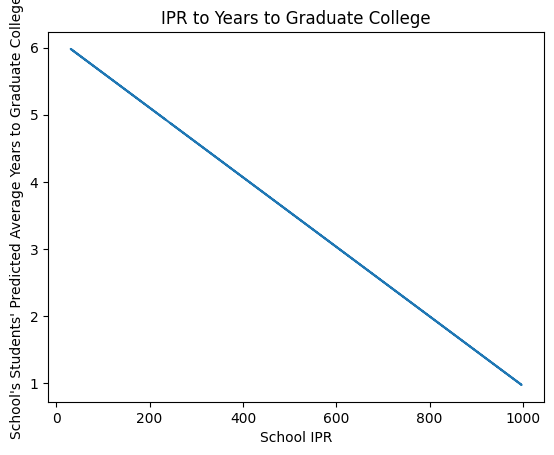

In [85]:
predictedyearsgraph=plt.plot(IPR["IPR_EST"],IPR["Years Prediction"])
plt.xlabel("School IPR")
plt.ylabel("School's Students' Predicted Average Years to Graduate College")
plt.title("IPR to Years to Graduate College")

###__High School GPA Prediction Graph__

Text(0.5, 1.0, 'IPR to High School GPA')

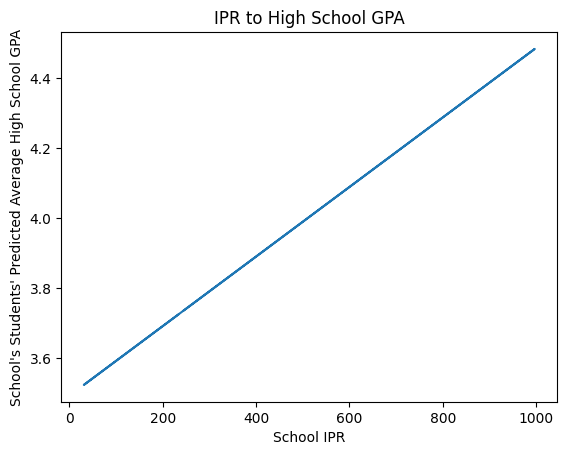

In [86]:
predictedhsGPA=plt.plot(IPR["IPR_EST"],IPR["HS GPA Prediction"])
plt.xlabel("School IPR")
plt.ylabel("School's Students' Predicted Average High School GPA")
plt.title("IPR to High School GPA")

###__Random Code__

In [87]:
#This was me just testing something at one point. IDK where it initally was.
print(graduation_rate["parental income"].tolist())
print(IPR.columns.tolist())
print(IPR["LAT"][2])

[94873, 42767, 46316, 52370, 92665, 76340, 65867, 64495, 78662, 61772, 84872, 59881, 70274, 50777, 68641, 83889, 43775, 43252, 35045, 46312, 50104, 61843, 44574, 55924, 34236, 77246, 109268, 96573, 59342, 61673, 53951, 83790, 36417, 62408, 63766, 103448, 52303, 90775, 78209, 61095, 62106, 64036, 52376, 72543, 39928, 41330, 58202, 30912, 85050, 62938, 103707, 64155, 73755, 35101, 60561, 41696, 67559, 78607, 94849, 48315, 36954, 67103, 46971, 25286, 68429, 75974, 60277, 48111, 38406, 39627, 70542, 47642, 52308, 63384, 78942, 81917, 77523, 72406, 92152, 56465, 87422, 70982, 33990, 86210, 33501, 63120, 85002, 64046, 73048, 67941, 72934, 85913, 38704, 49866, 87743, 72926, 71629, 102783, 56066, 85135, 75304, 75721, 64497, 70410, 84186, 99468, 75813, 29133, 58774, 60851, 72327, 76746, 104132, 79885, 77531, 85679, 32950, 43689, 44275, 44576, 91796, 77787, 59182, 64242, 70316, 62802, 69554, 78666, 48307, 61970, 46871, 86158, 66590, 82409, 90516, 27413, 52803, 51923, 69905, 61181, 82076, 49046, 

#__Multiple Linear Regression Model Creation__

In [88]:
#This first model is going to take parental income and parental education level as independent variables and output the predicted college GPA.

#This code below is just initializing some variables that will be needed.
parentalincomelist=graduation_rate["parental income"].tolist()
parentaleducationlist=[]

#I'm creating a way to assign a numeric value to parental educational attainment and then create a list containing those values.
#The for loop is iterating through the parental education column of our dataset and creating a new, numeric version of the data.
for degree in graduation_rate["parental level of education"]:
  if degree == "some high school":
    parentaleducationlist.append(0)
  elif degree == "high school":
    parentaleducationlist.append(1)
  elif degree == "associate's degree":
    parentaleducationlist.append(2)
  elif degree == "some college":
    parentaleducationlist.append(3)
  elif degree == "bachelor's degree":
    parentaleducationlist.append(4)
  elif degree == "master's degree":
    parentaleducationlist.append(5)

#Everything above this point won't need to be repeated in order to create additional models.
#Techically I just repeated it from my single/simple linear regression models, but I want to be able to run this code and have it work w/o having to run the other box.
#This code block is actually creating our multiple linear regression model (for college GPA).
bivariatetrainer=np.array(list(zip(parentalincomelist,parentaleducationlist))).reshape((-1,2))
colGPAtrainer = np.array(graduation_rate["college gpa"].to_list())
individualcolGPApredictor = LinearRegression().fit(bivariatetrainer,colGPAtrainer)

#I'm just going to calculate the R score to see how well it fits.
Rscore=individualcolGPApredictor.score(bivariatetrainer,colGPAtrainer)
print("R score: {}".format(Rscore))

#And now I am going to create a dictionary that keeps track of the R score for each predictor/model that I make.
multivarRscoresdict={}
multivarRscoresdict["Individual College GPA Predictor"]=Rscore
print(multivarRscoresdict)

print(individualcolGPApredictor.predict([[100000,5]])) #I'm just seeing if the model outputs some sort of reasonable value.

R score: 0.2156799082085069
{'Individual College GPA Predictor': 0.2156799082085069}
[3.57345524]


In [89]:
#This second model is going to take the same independent variables as before, but the output will be predicted years to graduate college.

#This code block is actually creating our multiple linear regression model (for years to graduate college).
yearstrainer = np.array(graduation_rate["years to graduate"].to_list())
individualyearspredictor = LinearRegression().fit(bivariatetrainer,yearstrainer)

#I'm just going to calculate the R score to see how well it fits.
Rscore=individualyearspredictor.score(bivariatetrainer,yearstrainer)
print("R score: {}".format(Rscore))

#And now I am going to update dictionary that keeps track of the R score for each predictor/model that I make.
multivarRscoresdict["Individual Years Predictor"]=Rscore
print(multivarRscoresdict)

print(individualyearspredictor.predict([[100000,5]])) #I'm just seeing if the model outputs some sort of reasonable value.

R score: 0.0590092988312253
{'Individual College GPA Predictor': 0.2156799082085069, 'Individual Years Predictor': 0.0590092988312253}
[4.34504203]


#__College Destiny Calculator__ (creates model that accepts user input rather than dataset IPR values)

In [90]:
#This is going to create a model that determines your "college destiny" based on your parents' income and education level.
def collegedestiny():
  futurecolGPA=0.0
  futureyears=0.0
  printstatement={}
  userparentalincome=float(input("What is your parents' income? Do not use commas."))
  userparentaleducation=float(input("What is your parents' level of education? Input '0' for some high school, '1' for high school, '2' for associate's degree, '3' for some college, '4' for bachelor's degree, and '5' for master's degree."))
  if input("Would you like to predict your future college GPA? If so, type 'yes'.").strip().lower()=="yes"or"yep"or"sure": #accounting for users not reading directions
    futurecolGPA=individualcolGPApredictor.predict([[userparentalincome,userparentaleducation]])
    printstatement.update({"Future College GPA":float(futurecolGPA)})
  if input("Would you like to predict the years it will take you to graduate college? If so, type 'yes'.").strip().lower()=="yes"or"yep"or"sure":
    futureyears=individualyearspredictor.predict([[userparentalincome,userparentaleducation]])
    printstatement.update({"Years to Graduate College":float(futureyears)})
  return print(printstatement)

In [91]:
collegedestiny() #Meeting your fate (calling the function)

What is your parents' income? Do not use commas.100000
What is your parents' level of education? Input '0' for some high school, '1' for high school, '2' for associate's degree, '3' for some college, '4' for bachelor's degree, and '5' for master's degree.2
Would you like to predict your future college GPA? If so, type 'yes'.yes
Would you like to predict the years it will take you to graduate college? If so, type 'yes'.yes
{'Future College GPA': 3.540266614594409, 'Years to Graduate College': 4.484752132753026}
